# 4. Data Mining
We will address finally running the Regression algorithms. In particular we will use:
a. Regression Trees
b. Lasso Regression
c. Linear Regression.


## Packages to use
Make sure, that we use the packages that were referenced in the slides and in the exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_train = load_step("step3_X_train")
X_test = load_step("step3_X_test")
y_train = load_step("step3_y_train")
y_test = load_step("step3_y_test")

X_train_scaled = load_step("step3_X_train_scaled")
X_test_scaled = load_step("step3_X_test_scaled")

## a. Regression Trees
The idea when using Regression Trees is to create two models, one using the unscaled data (since this methods does not require scaling), and one using the scaled data. The intuition is that the performance should be the same on both models. After running both models we can see that our hypothesis was correct and there is in fact no difference between the unscaled and the scaled models when it comes to performance.

#### a.1 Unscaled Data -- Random Forest

In [2]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,           
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 wichtige Features:")
print(importances.head(20))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 269.44
Random Forest R²: 0.360

Top 10 wichtige Features:
acousticness                    0.082558
duration_ms                     0.079466
danceability                    0.076006
loudness                        0.075277
energy                          0.073880
valence                         0.071427
speechiness                     0.070847
instrumentalness                0.065586
tempo                           0.064577
liveness                        0.061380
length                          0.055871
word_count                      0.030533
genre__Country_Americana        0.019213
amount_genres                   0.018124
genre__Mood_Functional_Other    0.014047
genre__Rock                     0.013996
genre__Electronic_Dance         0.011534
genre__Soundtrack_Showtunes     0.011300
genre__World_International      0.010638
mode                            0.010140
dtype: float64


#### a.1.1 Unscaled Data -- Regression tree

In [3]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train, y_train)

# Predict the Popularity
y_pred = regressor.predict(X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  360.1633002074517
R²:  0.14385424830594873


#### a.2 Scaled Data -- Random Forest

In [4]:

rf_scaled = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,            
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 269.44
Random Forest (scaled) R²: 0.360

Top 10 wichtige Features (scaled):
acousticness        0.082558
duration_ms         0.079466
danceability        0.076006
loudness            0.075277
energy              0.073880
valence             0.071427
speechiness         0.070847
instrumentalness    0.065586
tempo               0.064577
liveness            0.061380
dtype: float64


#### a.2 Scaled Data -- Regression tree

In [5]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train_scaled, y_train)

# Predict the Popularity
y_pred_scaled = regressor.predict(X_test_scaled)

# What do the metrics say about the model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred_scaled))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  360.1633002074517
R²:  0.14385424830594873


#### a.3 Visualization - Random forest

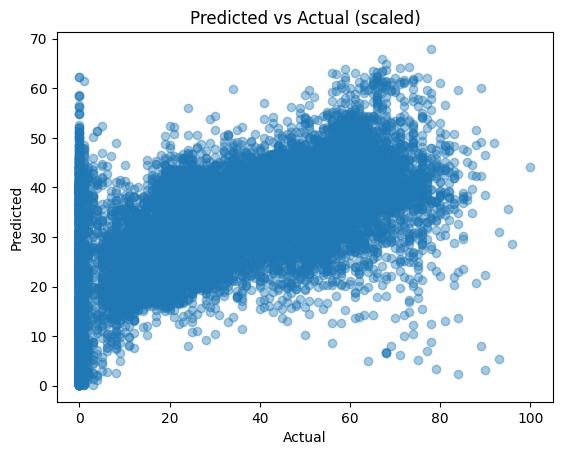

In [6]:
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()

#### a.3 Visualization - Regression tree

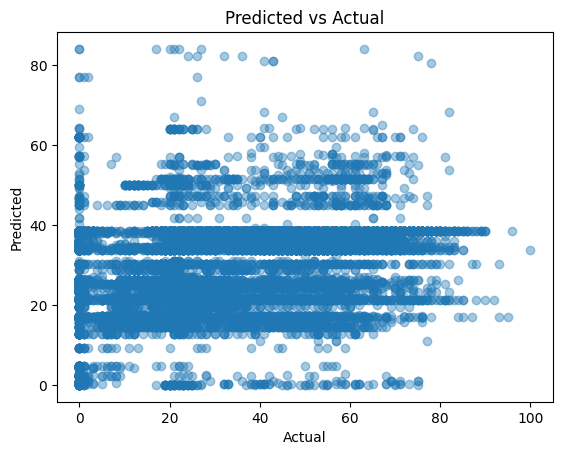

In [7]:
# How did we do?
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

Number of Songs with Popularity = 0: duration_ms                                   0
explicit                                  64485
danceability                                  0
energy                                        0
loudness                                      0
mode                                      25574
speechiness                                   0
acousticness                                 11
instrumentalness                          23699
liveness                                      0
valence                                      11
tempo                                         0
genre__Classical_Opera                    68381
genre__Country_Americana                  68247
genre__Electronic_Dance                   55499
genre__Folk_Acoustic_Singer-Songwriter    67642
genre__Hip-Hop_Rap                        69827
genre__Jazz_Blues                         69153
genre__Latin                              64190
genre__Metal                              65571
gen

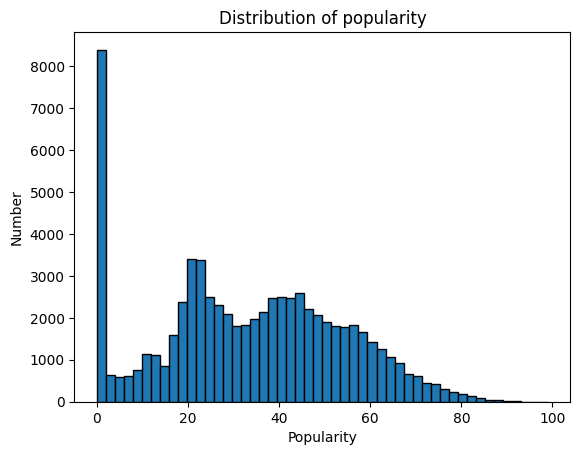

In [ ]:
# Check for popularity 
count_zeros = (X_train == 0).sum()
total = len(y_train)
percent_zeros = count_zeros / total * 100

print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# visualize
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity')
plt.show()